# Part I - (Loan Data From Prosper)
## by (Oni Sodiq Adesola)

## Introduction
> Whether you want to consolidate debt to lower your monthly payments, finish a home improvement project, pay off medical debt, buy a car, or take a vacation, you can apply for a fast, easy personal loan through Prosper today!
This project is a part of Exploratory Data Analysis course. Here, we have used one of the curated data sets, provided by Udacity. It is the prosper loan data set, that contains information about loan listings and related variables including borrower as well as lender information. It contains variables related to Borrower such as credit rating, prosper rating etc. Moreover, the dataset also has lender information.

> When borrowers apply for a loan at Prosper, it is inevitable that borrowers will be concerned about the Annual Percentage Rate(APR) that will be charged for the loan. The APR gets affected by several factors, and we intend to explore those variables in present analysis. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Display the shape about the dataframe
df.shape

(113937, 81)

In [4]:
# Display quick sample information about the dataframe
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
855,46DD3519823486450FBD8B0,514111,2011-07-02 13:32:54.207000000,NaN,36,Completed,2012-07-31 00:00:00,0.30532,0.2699,0.2599,...,-110.60,0.0,0.00,0.00,0.0,1.0,0,0,0.0,110
102402,F13A3429584917640813A3E,385724,2008-08-20 13:34:39.660000000,B,36,Completed,2011-09-03 00:00:00,0.17899,0.1645,0.1545,...,-124.62,0.0,0.00,0.00,0.0,1.0,0,0,0.0,195
32915,318D34192748246677EC76D,325217,2008-05-03 22:25:09.537000000,AA,36,Chargedoff,2010-01-15 00:00:00,0.09678,0.0899,0.0799,...,-62.26,-40.8,3154.00,3154.00,0.0,1.0,0,0,0.0,179
67285,CFB33591664534518D11023,967311,2013-10-09 10:04:00.960000000,NaN,36,Current,NaN,0.18479,0.1485,0.1385,...,-19.86,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
72446,41C13520408829784A777B9,516510,2011-07-14 19:34:03.857000000,NaN,36,Completed,2013-09-10 00:00:00,0.22362,0.1899,0.1799,...,-223.78,0.0,0.00,0.00,0.0,1.0,0,0,0.0,105
68370,BE363599218498445C66C00,1099715,2013-12-27 12:34:16.867000000,NaN,60,Current,NaN,0.14658,0.1239,0.1139,...,-18.93,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
39986,3BD13604608702498C7AE1F,1194679,2014-03-03 15:35:24.460000000,NaN,60,Current,NaN,0.18068,0.1570,0.1470,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
105600,10DE3539928356073E0B412,560264,2012-02-18 10:13:17.020000000,NaN,60,Completed,2012-08-31 00:00:00,0.25451,0.2293,0.2193,...,-60.88,0.0,0.00,0.00,0.0,1.0,1,0,0.0,133
5627,9AF83398709518465F1FF1B,190582,2007-08-21 11:59:15.007000000,C,36,Defaulted,2008-07-03 00:00:00,0.17219,0.1650,0.1500,...,-72.22,0.0,16020.23,16020.22,0.0,1.0,0,0,0.0,516
11622,155D354898546354653CCD9,600144,2012-06-15 08:15:46.997000000,NaN,36,Chargedoff,2013-03-21 00:00:00,0.33553,0.2958,0.2858,...,-13.02,-25.5,3709.36,3709.36,50.0,1.0,0,0,0.0,1


In [5]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The dataframe comprises 113,937 rows and 81 columns. 3 columns contains boolean, 50 columns contains floats, 11 columns contains integers and 17 columns contains objects data type.

### What is/are the main feature(s) of interest in your dataset?

> Few variables that will be anlayzed here include,
<ul>
<li> BorrowerAPR: The Borrower’s APR for the loan. Every borrower is concerned about the APR, he/she will be charged for the loan, hence it is crucial to study it.</li>
<li> ProsperRating: The Prosper Rating assigned at the time the listing was created, between AA - HR. The rating assigned by Prosper helps to decide the APR the borrower should be charged.</li>
<li> CreditGrade: The Credit rating that was assigned at the time the listing went live. Overall credit grade is important to judge the credit worthiness of a borrower.</li>
<li> InquiriesLast6Months: Number of inquiries in the past six months at the time the credit profile was pulled. Borrowers who are in desperate need of money tend to make several inquiries to the Credit Bureau, hence, should be analyzed.</li>
<li> BankCardUtilization : The percentage of available revolving credit that is utilized at the time the credit profile was pulled. Higher balance on the credit card indicates borrower’s inability to pay off debts.</li>
<li> EstimatedLoss : Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009. Borrowers are often cautious in investing money in ventures with high loss, hence estimated loss is crucial.</li>
<li> OnTimeProsperPayments : Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans. Borrowers who have made payments on time are rated highly by credit agencies.</li>
<li> DebtToIncomeRatio : The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01. The ratio of debt to income indicates spending habits of the borrower.</li>
<li> LoanOriginalAmount : The origination amount of the loan.</li>
<li> IncomeRange : The income range of the borrower at the time the listing was created. It is highly probable that high earning borrowers will be granted higher loan amount.</li>
<li> StatedMonthlyIncome : The monthly income the borrower stated at the time the listing was created. Similar to IncomeRange, monthly income gives information about the credibility of the borrower.</li>
<li> Borrower State : The two letter abbreviation of the state of the address of the borrower at the time the Listing was created. We plan to investigate the percentage of defaulters across the country. To this end, percentage of defaulters for each state need to be calculated.</li>
<li> Loan Status: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. This variable needs to be investigated to determine loan performance at state level.</li>
<li> EmploymentStatus: The employment status of the borrower at the time they posted the listing.</li>
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>For this project, I plan to answer following questions;
<ul>
    <li> Find the variables, that help to decide the Borrower APR while granting a loan, and</li>
    <li> Next, identify variables which affect prosper rating for a given borrower.</li>
    </ul>

## Assessing Data

In this session, our dataframe will be assess with particular focus on the features of interest. The major goal here is data exploration, hence findings on quality and tidiness will be collated under the assessment summary, and addressed using a brief and concise cleaning workflow.

First, let's create a list containing the key features for our analysis:

In [8]:
# Create a list of interested feature names
interested_features = ['BorrowerAPR', 'ProsperRating (Alpha)', 'Term', 'InquiriesLast6Months',
                'BankcardUtilization', 'EstimatedLoss', 'OnTimeProsperPayments', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'IncomeRange',
                'StatedMonthlyIncome', 'BorrowerState', 'LoanStatus', 'EmploymentStatus']

In [9]:
# disply table containing sample of interested features
df[interested_features].sample(30)

,BorrowerAPR,ProsperRating (Alpha),Term,InquiriesLast6Months,BankcardUtilization,EstimatedLoss,OnTimeProsperPayments,DebtToIncomeRatio,LoanOriginalAmount,IncomeRange,StatedMonthlyIncome,BorrowerState,LoanStatus,EmploymentStatus
60573,0.13227,A,60,0.0,0.02,0.0324,26.0,0.05000,16000,"$100,000+",8750.000000,IL,Current,Employed
13681,0.30168,NaN,36,8.0,0.94,NaN,NaN,0.15000,5000,"$50,000-74,999",5416.666667,CA,Chargedoff,Full-time
54816,0.31790,E,36,1.0,0.23,0.1325,NaN,0.19000,3000,"$1-24,999",1815.916667,NJ,Current,Employed
89527,0.19108,B,36,0.0,0.93,0.0595,NaN,0.18000,5000,"$75,000-99,999",6583.333333,WA,Current,Employed
93977,0.24614,D,36,2.0,0.62,0.0925,NaN,0.34000,10000,"$25,000-49,999",3750.000000,PA,Current,Employed
5063,0.28570,NaN,36,1.0,NaN,NaN,NaN,0.27000,5000,Not displayed,5250.000000,NaN,Chargedoff,Not available
44189,0.29240,D,36,1.0,1.00,0.1050,16.0,0.20000,4000,"$75,000-99,999",7603.333333,MO,Completed,Employed
3454,0.30337,E,60,2.0,0.89,0.1375,NaN,0.12000,8000,"$50,000-74,999",4300.000000,MA,Current,Employed
70062,0.37453,NaN,36,2.0,0.00,NaN,NaN,0.08000,2000,"$25,000-49,999",2500.000000,IL,Defaulted,Full-time
6372,0.19988,C,60,1.0,0.64,0.0699,NaN,0.25000,7000,"$25,000-49,999",3416.666667,IL,Current,Employed


In [10]:
#check information about rows, columns, and data types of interested features
df[interested_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BorrowerAPR            113912 non-null  float64
 1   ProsperRating (Alpha)  84853 non-null   object 
 2   Term                   113937 non-null  int64  
 3   InquiriesLast6Months   113240 non-null  float64
 4   BankcardUtilization    106333 non-null  float64
 5   EstimatedLoss          84853 non-null   float64
 6   OnTimeProsperPayments  22085 non-null   float64
 7   DebtToIncomeRatio      105383 non-null  float64
 8   LoanOriginalAmount     113937 non-null  int64  
 9   IncomeRange            113937 non-null  object 
 10  StatedMonthlyIncome    113937 non-null  float64
 11  BorrowerState          108422 non-null  object 
 12  LoanStatus             113937 non-null  object 
 13  EmploymentStatus       111682 non-null  object 
dtypes: float64(7), int64(2), object(5)
m

In [11]:
# check for duplicates
df[interested_features].duplicated().sum()

871

In [12]:
#check statistical description

df[interested_features].describe()

,BorrowerAPR,Term,InquiriesLast6Months,BankcardUtilization,EstimatedLoss,OnTimeProsperPayments,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome
count,113912.000000,113937.000000,113240.000000,106333.000000,84853.000000,22085.000000,105383.000000,113937.00000,1.139370e+05
mean,0.218828,40.830248,1.435085,0.561309,0.080306,22.271949,0.275947,8337.01385,5.608026e+03
std,0.080364,10.436212,2.437507,0.317918,0.046764,18.830425,0.551759,6245.80058,7.478497e+03
min,0.006530,12.000000,0.000000,0.000000,0.004900,0.000000,0.000000,1000.00000,0.000000e+00
25%,0.156290,36.000000,0.000000,0.310000,0.042400,9.000000,0.140000,4000.00000,3.200333e+03
50%,0.209760,36.000000,1.000000,0.600000,0.072400,15.000000,0.220000,6500.00000,4.666667e+03
75%,0.283810,36.000000,2.000000,0.840000,0.112000,32.000000,0.320000,12000.00000,6.825000e+03
max,0.512290,60.000000,105.000000,5.950000,0.366000,141.000000,10.010000,35000.00000,1.750003e+06


In [13]:
#check BorrowerState value counts

df[interested_features].BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [14]:
#check IncomeRange value counts

df[interested_features].IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### Quality and Tidiness issue

1. Extracting the interested features from the dataset
2. Not employed data in IncomeRange range could be replaced with 0
3. Duplicated data (871 duplicates)
4. ProsperRating and IncomeRange are ordinal categorical variables and should be stored in ordered form.
5. Null values in  BorrowerAPR and ProsperRating (Alpha) columns.
6. ProsperRating (Alpha) can be change to a better name that will be easy to work with.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing.

In [15]:
# Make copy of original piece of data

df_clean = df.copy()

1. Extracting the interested features from the dataset

In [16]:
# Extract the interested features from the original dataframe
df_clean = df_clean[interested_features]

# Verify the changes made
assert len(df_clean.columns) == len(interested_features)

2. Not employed data in IncomeRange range could be replaced with 0

In [17]:
df_clean.IncomeRange = df_clean.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
df_clean.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

3. Drop duplicate data

In [18]:
df_clean = df_clean.drop_duplicates()

# Verify changes
sum(df_clean.duplicated())

0

4. ProsperRating and IncomeRange are ordinal categorical variables and should be stored in ordered form.

In [19]:
# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df_clean[key] = df_clean[key].astype(correct_order)

# Verify changes
df_clean[order_dict.keys()].dtypes

ProsperRating (Alpha)    category
IncomeRange              category
dtype: object

5. Null values in  BorrowerAPR and ProsperRating (Alpha) columns.

In [22]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating (Alpha)']

# Filter out null values from the dataframe
for col in null_columns:
    df_clean = df_clean[df_clean[col].notnull()]

# Verify results
for col in null_columns:
    assert df_clean[col].notnull().any()

6. ProsperRating (Alpha) can be change to a better name that will be easy to work with.

In [23]:
df_clean = df_clean.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ProsperRating']:
    assert col_name in df_clean.columns

## Univariate Exploration

The BorrowerAPR (Annual percentage rate) is one of our interested features of interest. Let's start by exploring how the feature is distributed throughout our dataset:

### Question 1: How are Borrower APR values distributed in the dataset?

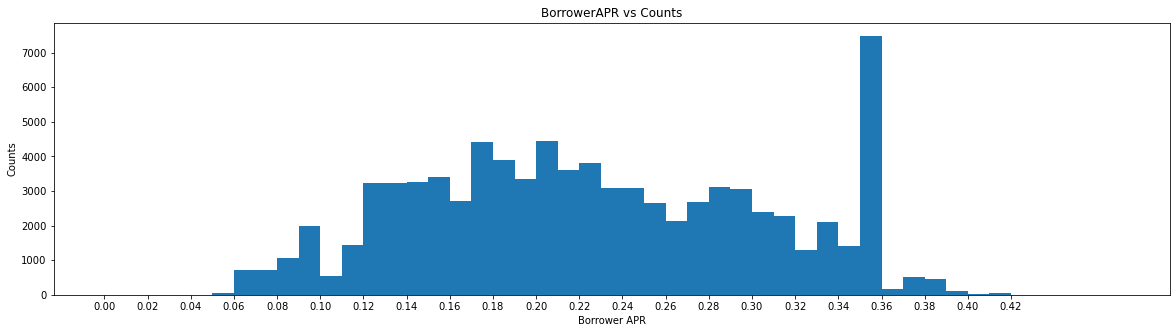

In [24]:
# Set a larger figure size for plot
plt.figure(figsize = [20, 5]) 


# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

#set a dynamic number of bins with step-size 0.01
bins = np.arange(0, df_clean['BorrowerAPR'].max()+0.05, 0.01)

plt.hist(df_clean['BorrowerAPR'], bins = bins, color = base_color)
plt.xticks(np.arange(0, 0.44, 0.02))
plt.title('BorrowerAPR vs Counts')
plt.ylabel('Counts')
plt.xlabel('Borrower APR');

## Observation

There are peaks around 0.09, 0.18 and 0.21 respectively. There is also a very sharp peak between 0.35 and 0.36. Also, only few listings have borrower APR greater than 0.4. This looks roughly like a normal distribution aside the peak between 0.35 and 0.36.



Next we look at variables that can affect BorrowerAPR.

### Question 2: How is Prosper Rating and Loan Status distributed in the dataset?

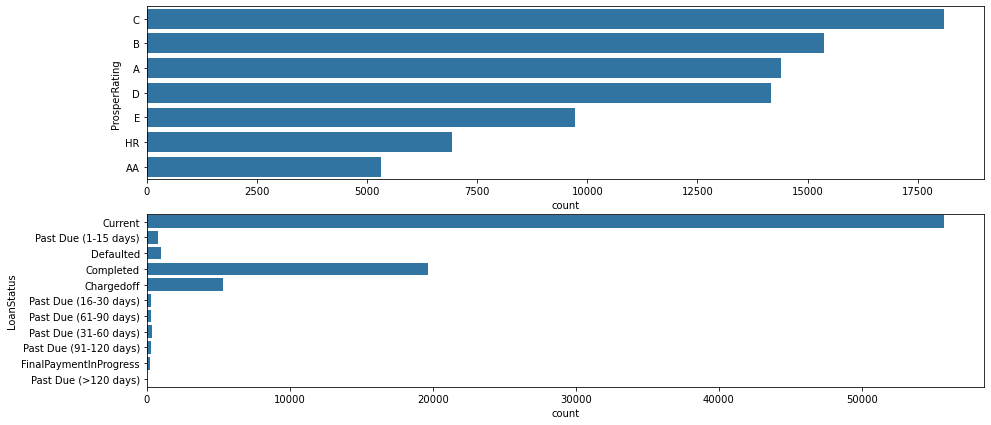

In [25]:
# Set a larger figure size for plot
plt.figure(figsize = [15, 7]) 


plt.subplot(2,1, 1)
# Count the frequency of unique values in the `ProsperRating` column of df_clean dataframe. 
# By default, returns the decreasing order of the frequency.
rating_counts = df_clean['ProsperRating'].value_counts()

# Get the unique values of the `ProsperRating` column, in the decreasing order of the frequency.
rating_order = rating_counts.index

base_color = sb.color_palette()[0]
sb.countplot(data= df_clean, y='ProsperRating', color=base_color, order= rating_order)


plt.subplot(2,1, 2)
sb.countplot(data = df_clean, y = 'LoanStatus', color = base_color);

## Observation

1. The distribution of prosper ratings is unimodal, with the most common rating belonging to the central grade represented (C). Listings with very high prosper ratings (AA) are the least common.

2. The bar graph suggests that majority of the loans have been paid on time. 

### Question 3: How is Term distributed in the dataset

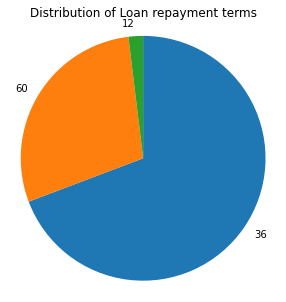

In [26]:
# Set a larger figure size for plot
plt.figure(figsize = [10, 5]) 



#generate a value count for the Term of loan

term_counts = df_clean['Term'].value_counts()

#Plot a pie chart

plt.pie(term_counts, labels = term_counts.index, startangle = 90, counterclock = False);

# We have the used option `Square`. 

plt.title('Distribution of Loan repayment terms')

plt.axis('square');

## Observation

1. It occurs that there are only three loan terms available in the dataset: 12 months, 36 months and 60 months. This corresponds to loan lengths of 1 year, 2 years and 5 years respectively. This may suggest that the prosper platform only provides borrowers with three terms for loan repayment, probably depending on the size of the loan.

2. The majority of borrowers apply for three-year loans, while others apply for five-year loans. Short-term loans of one year are the least requested.

### Question 4: How is InquiresLast6Months distributed in the dataset

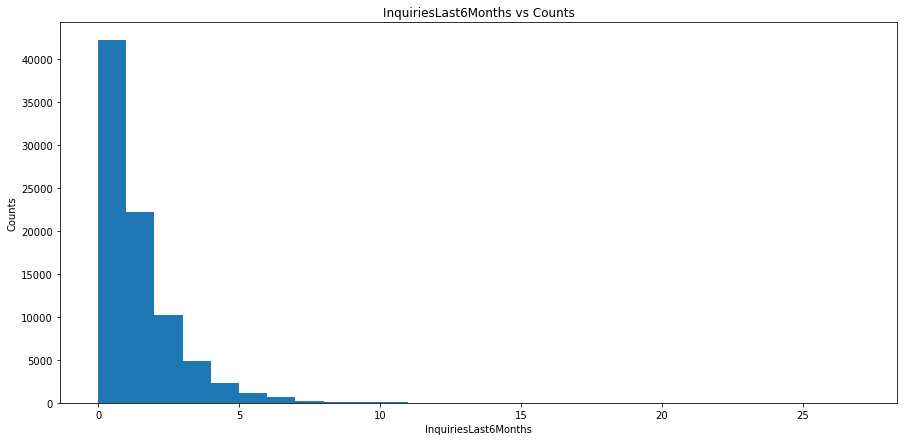

In [27]:
# Set a larger figure size for plot
plt.figure(figsize = [15, 7]) 



# Create bins with step-size 1

bins = np.arange(0, df_clean['InquiriesLast6Months'].max()+1, 1)

#plot an histogram for the distribution

plt.hist(data = df_clean, x = 'InquiriesLast6Months', bins = bins)
plt.title('InquiriesLast6Months vs Counts')
plt.ylabel('Counts')
plt.xlabel('InquiriesLast6Months');

## Observation

Most of the listings have number of inquiries less than 10. Moreover, we observe right skewness in the distribution. We conclude that frequent inuqiries to the bureau have not been made in recent six months.

### Question 5: What are the credit card behaviour of borrowers?

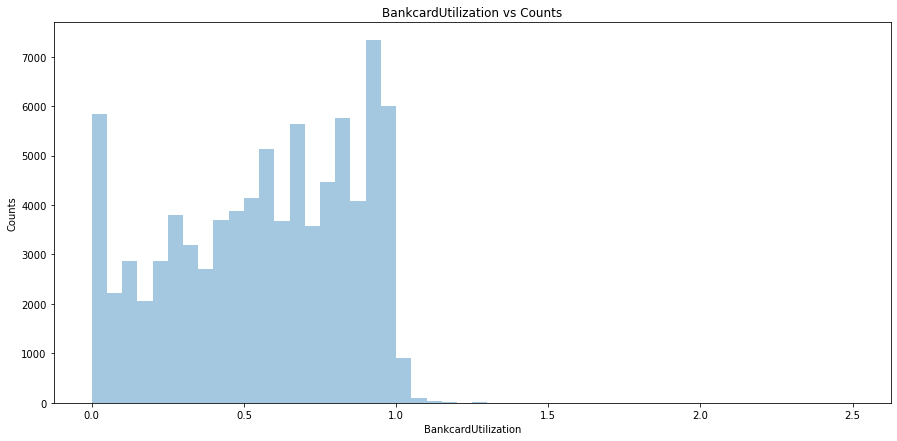

In [28]:
# Set a larger figure size for plot
plt.figure(figsize = [15, 7]) 


#make a distplot to show the creditcard behaviour of borrowers

sb.distplot(df_clean['BankcardUtilization'], kde=False)

#title label and axis
plt.title('BankcardUtilization vs Counts')
plt.ylabel('Counts')
plt.xlabel('BankcardUtilization');

## Observation

We observe an interesting trend from the above histogram. The distribution is relatively left skewed. Being left skewed makes sense, because most of the borrowers might have almost maxed out their credit limits. As seen from the summary stats, 75 percent of the population have used almost 83 percent of their limit.

### Question 6: How are Borrower State, Income range and Employment status distributed among listings in the dataset?

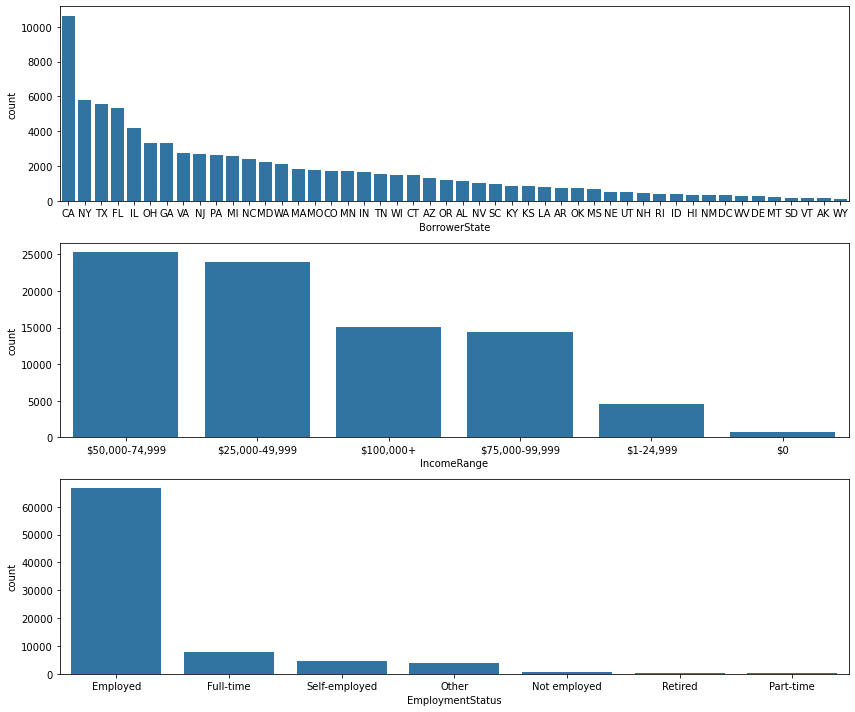

In [29]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

category = ['BorrowerState', 'IncomeRange', 'EmploymentStatus']


fig, ax = plt.subplots(nrows=3, figsize=(12, 10))

for col, index in zip(category, range(3)):
    counts = df_clean[col].value_counts()
    rating_order = counts.index

    sb.countplot(data= df_clean, x= df_clean[col], color = base_color, ax= ax[index], order = rating_order)
    
plt.tight_layout();

### Observation

1. CA which stands for california has the highest number of borrowers on the listings, with over 10,000 loan listings originating from borrowers in the state. Borrowers from New York (NY), Texas(TX), Florida(FL), and Illinois(IL) have also contributed over 4000 listings each. It is also interesting to note that the Prosper company is based in California. This may explain why the largest number of borrowers originated from that region. The least borrowers state is Wyoming(WY).

2. Most of the listings pertain to borrowers earning between 25,000 and 74,999 US dollars per annum. Only a few proportion of the listings had borrowers that earned below 25,000 US dollars per annum.

3. The pattern in employment status shows that the majority of listings are created by employed people. This quite make sense, considering how difficult it would be to obtain a loan without a job.


### Question 7: How are DebtToIncomeRatio, StatedMonthlyIncome and EstimatedLoss distributed among listings in the dataset?

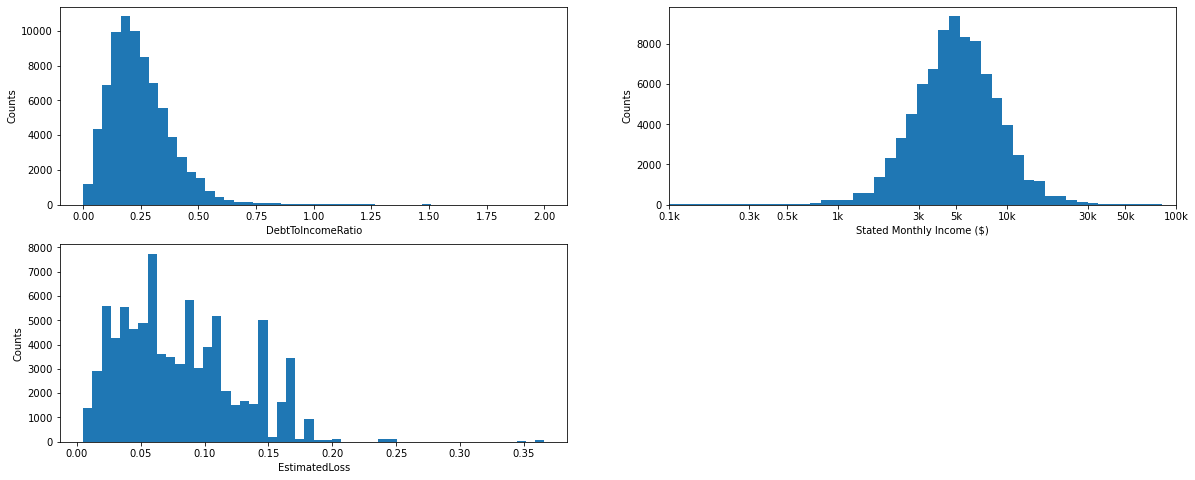

In [275]:
# creating figursize

plt.figure(figsize=(20, 8))



#creating a subplot

plt.subplot(2,2,1)

# creating an evenly spaced bins
bins = np.linspace(0, 2, 50)

# making a plot for DebtToIncomeRation
plt.hist(data=df_clean, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Counts');

#creating a subplot

plt.subplot(2,2,2)

# Create 100 evenly transformed bins
bins_trans = 10 ** np.linspace(0, np.log10(df_clean.StatedMonthlyIncome.max()), 100)

# making a plot for StatedMonthlyIncome
plt.hist(data=df_clean, x='StatedMonthlyIncome', bins=bins_trans)

# Convert x axis to symlog scale
plt.xscale('symlog')

# Create evenly spaced x-axis tick marks from 100 - 100,000 USD
plt.xticks([1e2, 3e2, 5e2, 1e3, 3e3, 5e3, 1e4, 3e4, 5e4, 1e5], ['0.1k', '0.3k', '0.5k', '1k', '3k', '5k', '10k', '30k', '50k', '100k'])

#creating x limit, and label for axes
plt.xlim(1e2, 1e5)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Counts');

# creating a subplot

plt.subplot(2,2,3)

#making a plot for EstimatedLoss with 50 bins

plt.hist(data=df_clean, x='EstimatedLoss', bins=50)

# labelling both axes
plt.xlabel('EstimatedLoss')
plt.ylabel('Counts');


### Observation

1. The DebtToIncomeRation is right skrew and the peak is around one-quarter and one-fifth of borrower's income.
2. The Stated Monthly Income distribution is normal with most monthly income ranging from about 1000USD to 30000USD and most borrowers earn around 5000USD.
3. The EstimatedLoss is multimoldal having multiple peaks, it is also roughly right skrew.


### Question 8: How are LoanOriginalAmount and OntimeProsperPayments distributed among listings in the dataset?

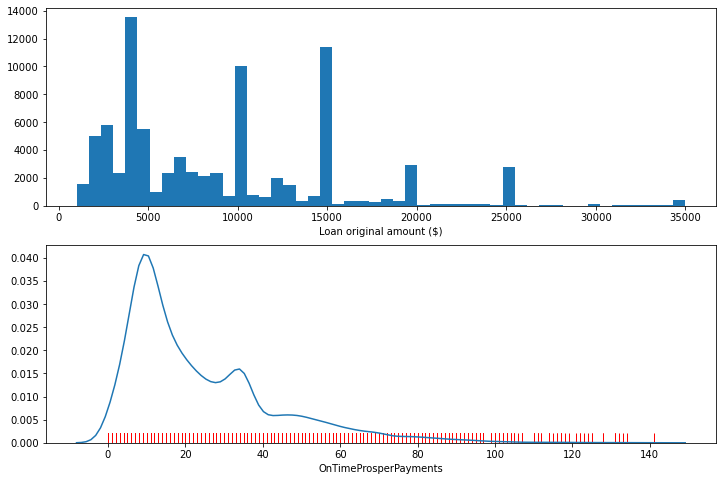

In [276]:
# creating figuresize

plt.figure(figsize=(12, 8))

# creating a subplot
plt.subplot(2,1,1)

#plotting a histogram

plt.hist(data=df_clean, x='LoanOriginalAmount', bins = 50)
plt.xlabel('Loan original amount ($)');

#creating a subplot
plt.subplot(2,1,2)

#plotting a distplot
sb.distplot(df_clean['OnTimeProsperPayments'], hist = False, rug = True, rug_kws = {'color' : 'r'})
plt.xlabel('OnTimeProsperPayments');



1. The LoanOriginalAmount is right skrew and also multimoldal. Moreover, we notice that it is quite rare for borrowers to ask for huge amount of loans through prosper.
2. Looking at the OnTimeProsperPayments distribution, we observe right skewness, indicating that many borrowers have not made payments on time.

## Bivariate Exploration

> In this section, we investigate the relationship between our interested features that will help us answer questions as regards the motive for this analysis.

### To start with, let us look at pairwise correlation between features in data

In [133]:
# Grouping both numerical and categorical variables

numeric_vars = ['BorrowerAPR', 'InquiriesLast6Months', 'BankcardUtilization', 'EstimatedLoss', 'OnTimeProsperPayments', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome']
categoric_vars = ['ProsperRating', 'IncomeRange', 'BorrowerState', 'LoanStatus', 'EmploymentStatus', 'Term']

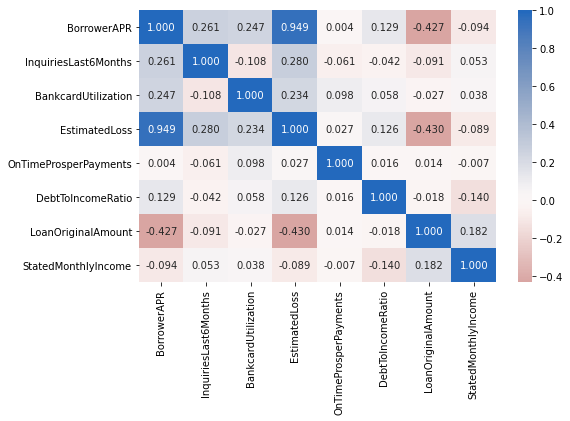

In [134]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

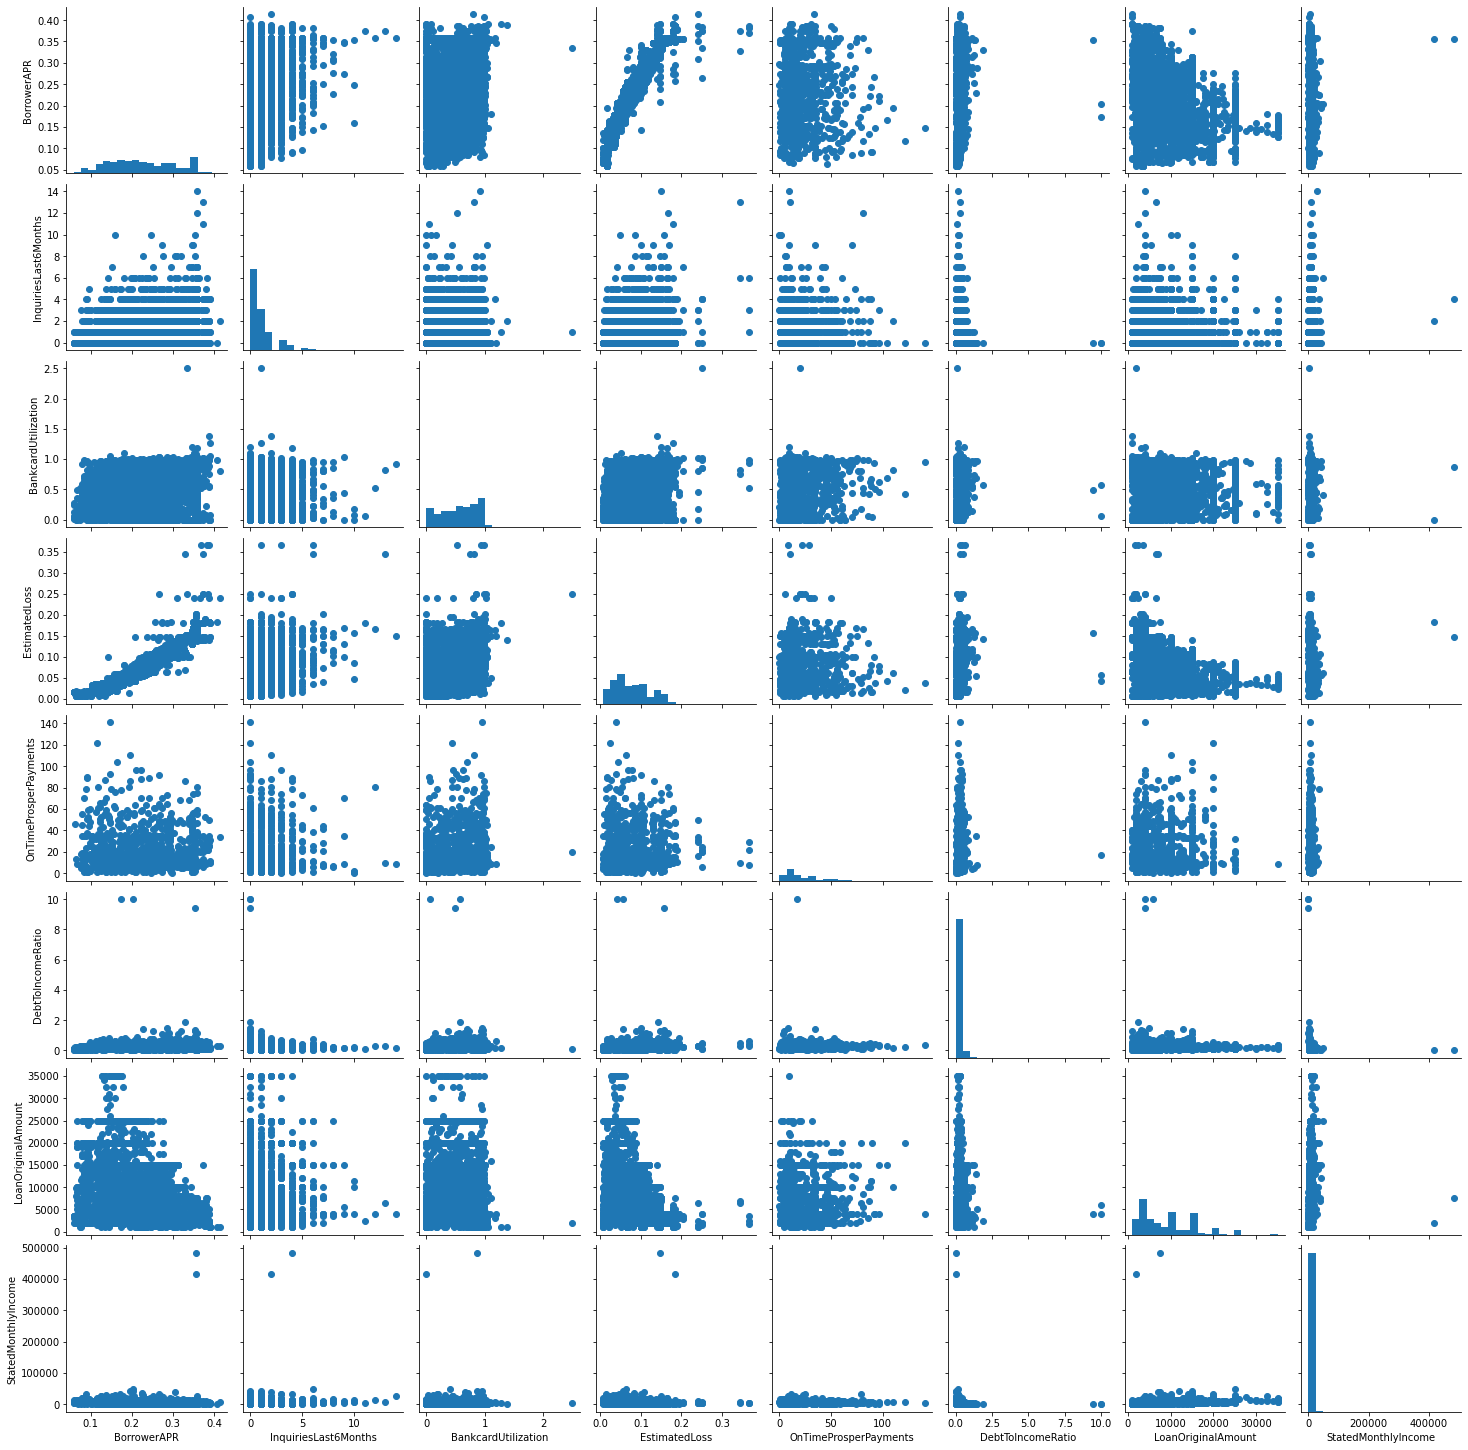

In [136]:
# plot matrix: let's take 4000 samples of df_clean, so that plots are clearer and they render faster

df_clean_samp = df_clean.sample(n=4000, replace = False)


g = sb.PairGrid(data = df_clean_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

1. There is a very strong correlation between BorrowerAPR and EstimatedLoss. This implies that the higher the BorrowerAPR the higher ther EstimatedLoss and vice-versa.
2. There appears to be a moderate negative correlation (-0.427) between loan original amount and Borrower APR. This implies that larger loans may attract lesser annual percentage rates than smaller loans.
3. There appears to be a moderate negative correlation (-0.43) between loan original amount and EstimatedLoss. This implies that larger loans may attract lesser estimated loss than smaller loans.
4. There are no notable relationships between the other numeric variables at the moment.

Let's see how BorrowerAPR and EstimatedLoss correlate with categorical variable

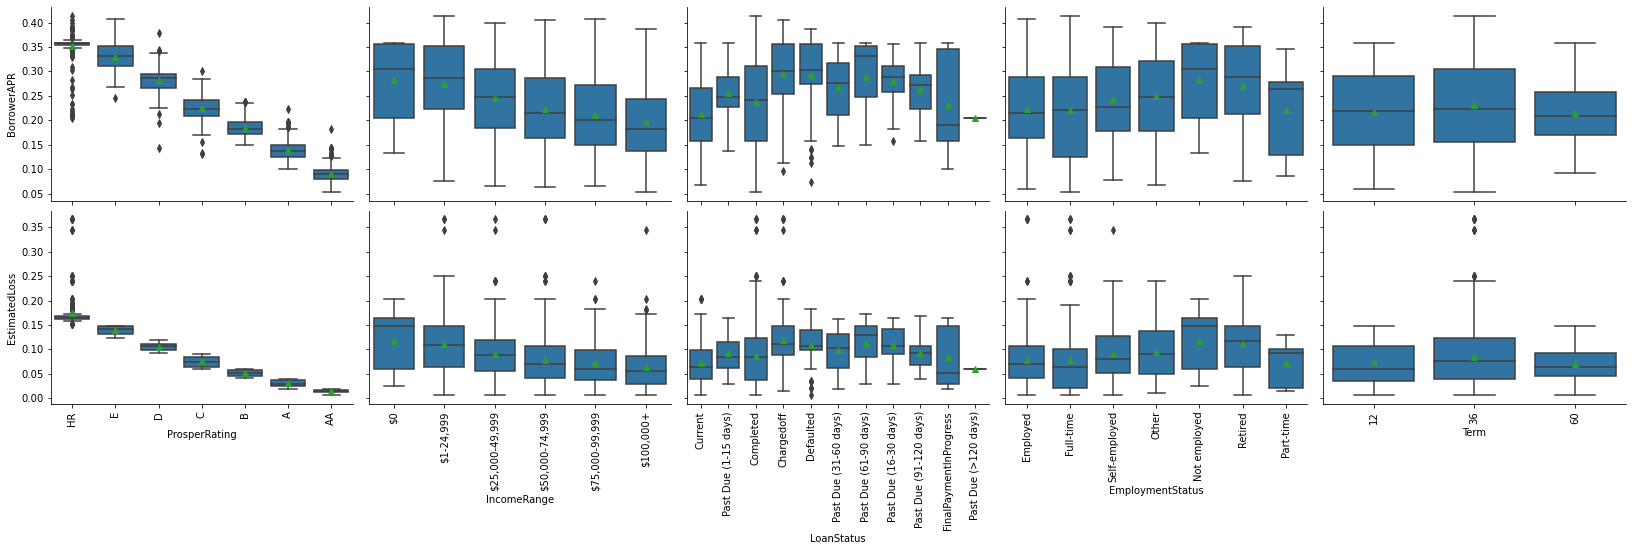

In [239]:
# plot matrix of numeric features against categorical features.


# Create a list of columns to plot on each pairgrid axis
x_cols = ['BorrowerAPR', 'EstimatedLoss']
y_cols = ['ProsperRating','IncomeRange', 'LoanStatus',  'EmploymentStatus', 'Term']

# select 4000 samples for clear visualization
df_clean_samp = df_clean.sample(n=4000, replace = False)


def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showmeans = True)



g = sb.PairGrid(data = df_clean_samp, x_vars = y_cols, y_vars = x_cols,
                height = 3, aspect = 1.5)
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
g.map(boxgrid);

1. As expected BorrowerAPR for borrowers with low prosper rating is quite higher than those with high prosper rating. Hence, there is an inverse relation with BorrowerAPR and ProsperRating. Similarly, BorrowerAPR reduces with increase in IncomeRange, which means those with high income range tends to have smaller APR.
2. It is easy to observe that the mean EstimatedLoss is significantly higher for risky borrowers. This makes sense because the lenders will be cautious in giving money to high risk borrowers.

We can conclude that both <b>BorrowerAPR</b> and <b>EstimatedLoss</b> are positively correllated and are both affected by <b>ProsperRating</b> and <b>IncomeRange</b>.

##### Let's see relationship between ProsperRating and other categorical features

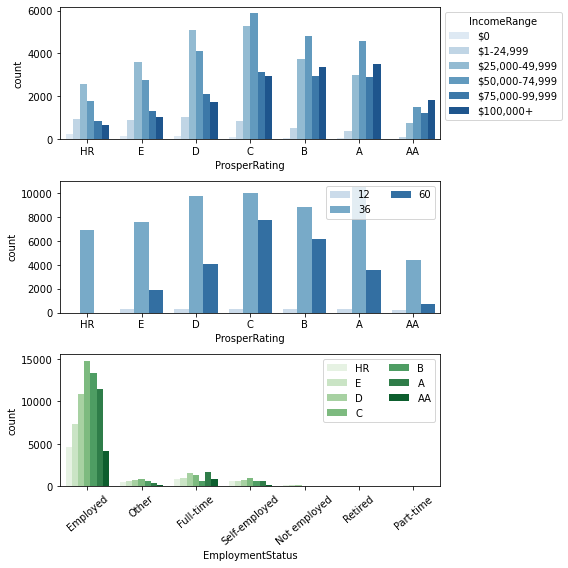

In [250]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_clean, x = 'ProsperRating', hue = 'IncomeRange', palette = 'Blues')
plt.legend(bbox_to_anchor=(1,1), loc="upper left", title = 'IncomeRange')
    

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_clean, x = 'ProsperRating', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'ProsperRating', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=40)

plt.tight_layout()

We noticed that high income earners are more concentrated at the higher end of the prosper rating spectrum. Also, it seems borrowers with lowest rating always go for loan duration of 36 months. 

It is difficult to tell what is happening in EmploymentStatus vs ProsperRating. For this reason, we will define a function to compute the proportion to see a better view of their relationship

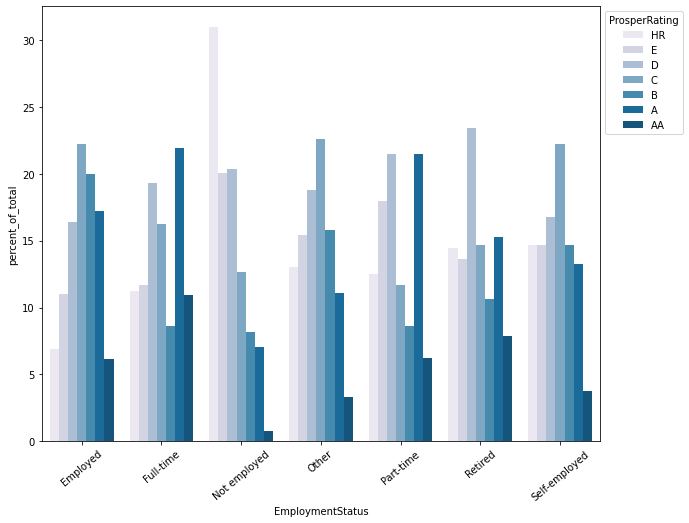

In [249]:
def compute_proportions(df, group_column, proportion_column):
    """
        Computes the proportions of proportion_col within group_col
        Params:
            :df (dataframe): dataframe of interest
            :group_column (string): name of grouping column
            :proportion_column (string): name of column to compute proportions for
        Output:
            returns a dataframe with relative frequencies of proportion_col within group_col
    """
    # First group dataframe by group_col and proportion_col
    df_1 = df.groupby([group_column, proportion_column]).agg({proportion_column: 'size'})
    
    # Compute the proportions of proportion_col within group_col
    df_2 = df_1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    # Rename proportion results and reset dataframe index
    df_2.rename(columns={proportion_column: 'percent_of_total'}, inplace=True)
    df_2 = df_2.reset_index()
    return df_2

def plot_proportions(df, group_column, proportion_column, cmap):
    """ Creates a clustered bar chart  of proportion_column and group_column"""
    # Call the compute proportion function
    table = compute_proportions(df, group_column, proportion_column)
    # Create Column bar chart
    sb.barplot(data=table, x= group_column, y= 'percent_of_total', hue=proportion_column, palette=cmap)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", title=proportion_column)
    
    
plt.figure(figsize=(10,8))


# EmploymentStatus vs ProsperRating

plot_proportions(df_clean, 'EmploymentStatus', 'ProsperRating', 'PuBu')

plt.xticks(rotation=40);


Now it is clear that the Not employed are widely populated with risky borrowers, hence it will be very risky to lend those category of people owing to the fact that they may likely default the payment when due.

#### Next we look at ProsperRating and numerical features

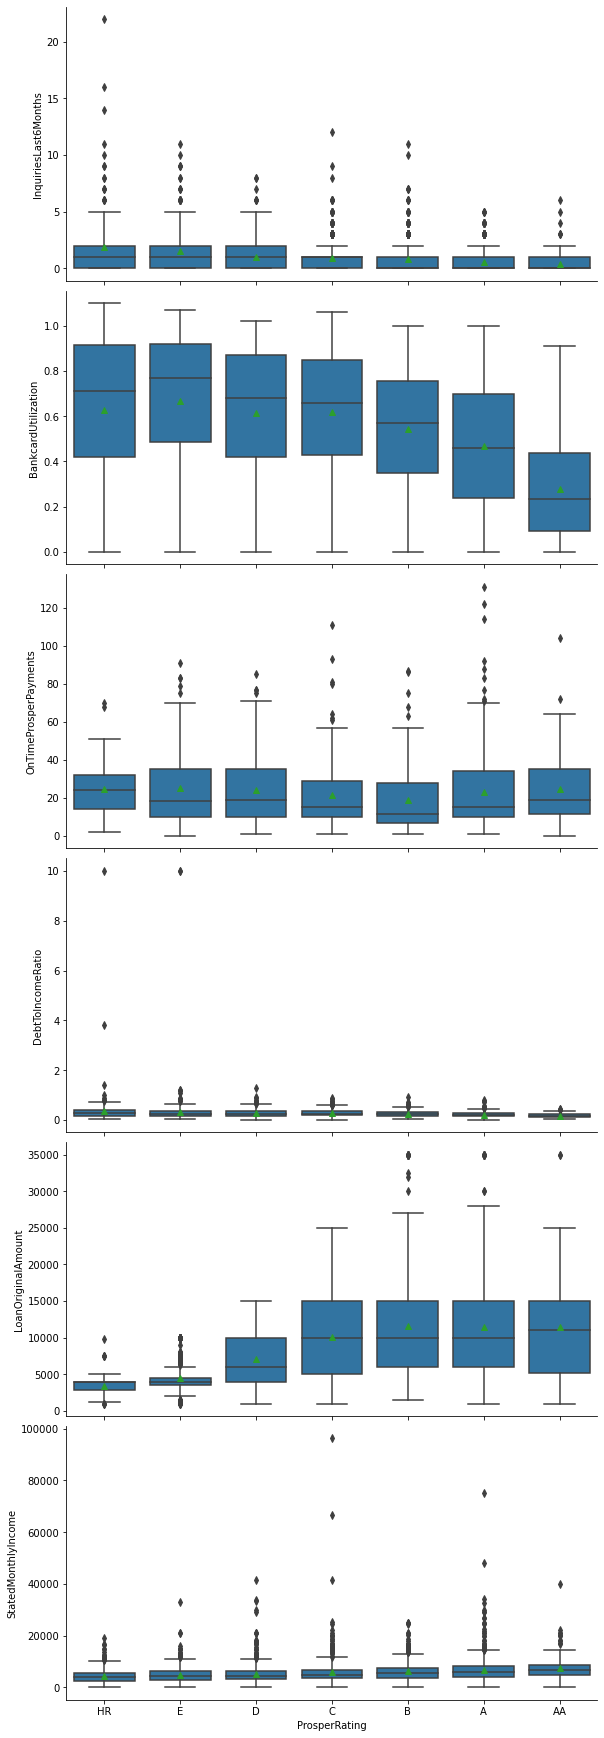

In [190]:
# plot matrix of numeric features against categorical features.


# Create a list of columns to plot on each pairgrid axis
y_cols = ['InquiriesLast6Months', 'BankcardUtilization',  'OnTimeProsperPayments', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome']
x_cols = ['ProsperRating']

#Select some 4000 samples

df_clean_samp = df_clean.sample(n=4000, replace = False)


def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color, showmeans = True)


g = sb.PairGrid(data = df_clean_samp, x_vars = x_cols, y_vars = y_cols,
                height = 4, aspect = 2)

g.map(boxgrid);

1. The distribution of BankCardUtilization for lower rating looks left skewed. This seems reasonable, because risky borrowers might have utilized their cards to the limit. Mostly, people with good ratings have low BankCardUtilization rate. If we observe the mean BankCardUtilization across different ProsperRating, we notice a wiggly behavior. Therefore, we can’t be sure that HighRisk borrowers must have higher BankCardUtilizaiton rate.

2. First, on an average the borrowers who have made frequent inquiries to the bureau have lower prosper rating, hence are more risky. Second, we see significant outliers for every value of ProsperRating. But the variation for safe borrowers is lower than other grades. It is expected, since borrowers in excellent credit rating tend not to make several inquiries to the bureau. Next, we also observe skewness in the distribution for InquiriesLast6Months. The mean is significantly higher than median in most of the cases. This can be attributed to the presence of significant number of outliers corresponding to each ProsperRating.

3. It is interesting to see presence of outliers for each ProsperRating on DebtToIncomeRatio. For safe borrowers, e.g. A,B, and AA outliers are not so prominent unlike their risky counterparts. For example, the risky borrowers have their outliers quite evenly spreadout. Moreover, we do not see much variation in the DebtToIncomeRatio across different values of ProsperRating. To conclude, DebtToIncomeRatio does not have significant impact on ProsperRating.

4. There is a positive relationship between StatedMonthlyIncome and ProsperRating, which emphasizes the collective effect that high incomes and high prosper ratings may have on lowering BorrowerAPR.

5. There is a positive relationship between LoanOriginalAmount and ProsperRating, which shows that people with high rating tends to have access to bigger loan compare to those with low rating.


Since there is a positive relationship between StatedMonthlyIncome and ProsperRating, Let's see State that are likely to be defaulters, i.e having low ProsperRating.

#### Checking likely defaulter states

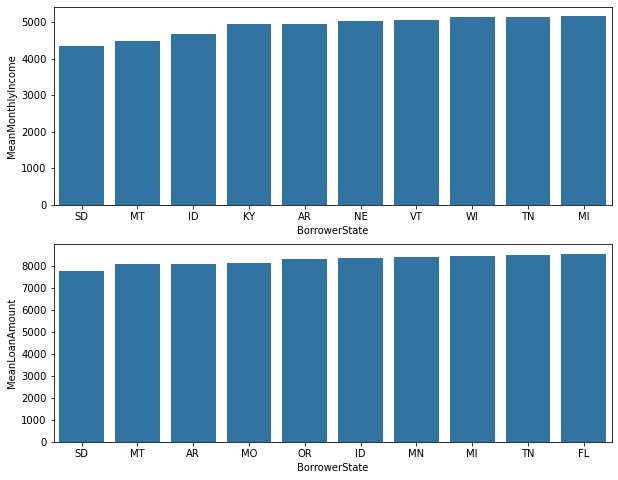

In [240]:
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

#creating figuresize
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
# Compute the mean StatedMonthlyIncome by BorrowerState
table_1 = df_clean.groupby('BorrowerState')['StatedMonthlyIncome'].mean()
table_1 = table_1.reset_index(name='MeanMonthlyIncome')

#select 10 bottom state
bottom = table_1.nsmallest(10, 'MeanMonthlyIncome')

sb.barplot(data= bottom, x='BorrowerState', y='MeanMonthlyIncome', color = base_color);

plt.subplot(2,1,2)
# Compute the mean LoanOriginalAmount by BorrowerState
table_2 = df_clean.groupby('BorrowerState')['LoanOriginalAmount'].mean()
table_2 = table_2.reset_index(name='MeanLoanAmount')

#select 10 least state
least = table_2.nsmallest(10, 'MeanLoanAmount')
sb.barplot(data= least, x='BorrowerState', y='MeanLoanAmount', color = base_color);

South Dakota seems to have lowest mean monthly income and mean loan amount among all states in the dataset. One possible reason for high default cases in South Dakota can be attributed to the fact that average loan amount for SouthDakota exceeds the average income of residents. There can be other reasons too, such as residents tend to spend on other luxuries in life rather than paying their debt, etc.

###  How did the feature(s) of interest vary with other features in the dataset?

1. High correlation between BorrowerAPR and EstimatedLoss, there exist inverse relation between BorrowerAPR and ProsperRating, likewise BorrowerAPR and IncomeRange.

2. ProsperRating varies inversely with EstimatedLoss and InquiriesLast6Months. There is also a positive relationship between ProsperRating and StatedMonthlyIncome.

### Relationships between the other features (not the main feature(s) of interest)?

1. Moderate Negative correlation between EstimatedLoss and LoanOriginalAmount.
2. Inverse relation between EstimatedLoss and IncomeRange.

## Multivariate Exploration

### Is there any relationship between LoanOriginalAmount, IncomeRange and ProsperRating?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


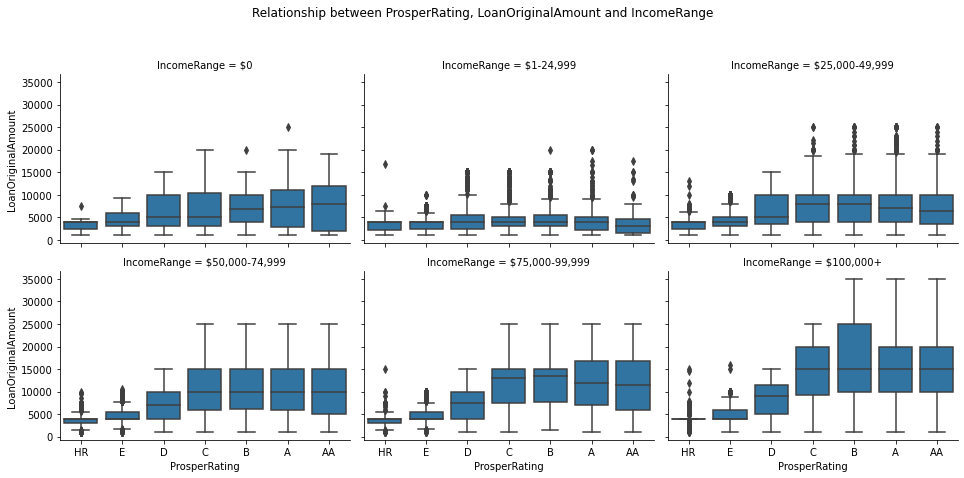

In [282]:

#Create a FacetGrid across all level of IncomeRange

g = sb.FacetGrid(data = df_clean, col = 'IncomeRange', col_wrap = 3, height = 3, aspect = 1.5)

# Plot a boxplot
g.map(sb.boxplot,'ProsperRating', 'LoanOriginalAmount')

g.fig.suptitle('Relationship between ProsperRating, LoanOriginalAmount and IncomeRange', y = 1.1);

1. Across every income range the average loan amount requested is lower for borrowers with low prosper rating. As expected for risky borrowers to get lower amount approved because of their low rating. 

2. Borrowers with excellent credit rating (AA) get the highest loan amount approved. Despite their low income, borrowers with excellent credit gain trust of lenders and seem to be favored while approving loan amount. 

3. Borrowers with high yearly incomes of 50000USD above exhibit quite consistent behavior in the requested loan amonts. There are no outliers for them. On the contrary, risky borrowers do have outliers across every Income range. One possible explanation is that these borrowers tend to overspend and hence need additional funds.

### Is there any relationship between LoanOriginalAmount, BorrowerAPR and ProsperRating?

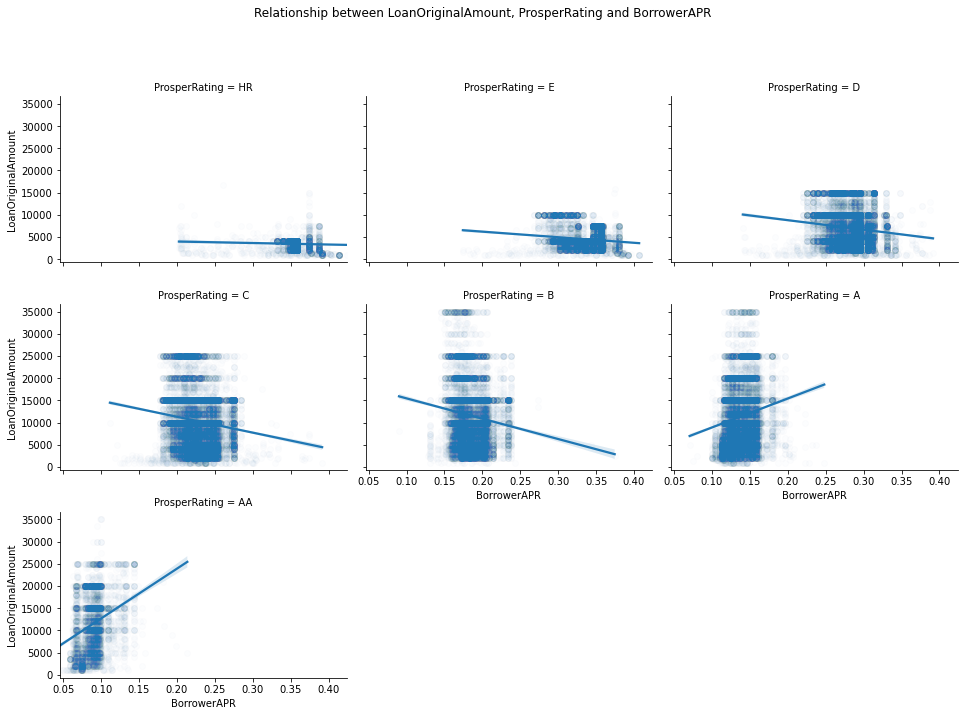

In [281]:
#create a FacetGrid across all ProsperRating

g = sb.FacetGrid(data = df_clean, col = 'ProsperRating', col_wrap = 3, height = 3, aspect = 1.5)

#plot a regplot

g.map(sb.regplot, 'BorrowerAPR', 'LoanOriginalAmount', color=base_color, scatter_kws={'alpha': 0.01})

g.fig.suptitle('Relationship between LoanOriginalAmount, ProsperRating and BorrowerAPR', y = 1.1);

Risky borrowers were able to take smaller loans with high rate, while those with higher prosper ratings enjoy higher loan amounts at lower rates. The regression line also shows the negative correlation between LoanOriginalAmount and BorrowerAPR for risky borrowers. They tend to have access to small loan. and the possitive correlation betweeen LoanOriginalAmount and BorrowerAPR for borrowers with high rating.

## Conclusions
>This projects was mainly to find those factors that are likely to affect Borrowers APR and those factors that influences the Borrowers rating on Prosper. The data given was not tidy enough, so I did some wrangling to handle some quality and tidiness issue. I also performed univariate, bivariate and multivariate exploration on features that may likely have effect on my target variables. From the analysis, I was able to deduce the following:

<ul>
<li>There is significant impact between BorrowerAPR, ProsperRating, LoanOriginalAmount and IncomeRange. That is, BorrowerAPR tends to be affected with ProsperRating, LoanOriginalAmount and IncomeRange. This three features can be use to predict BorrowerAPR on Prosper  </li>
    
<li>A significant impact was discovered between ProsperRating, EstimatedLoss and InquiriesLast6Months. This is expected, since borrowers who have been prompt in repaying entire loan amount on time ought to have higher ProsperRating. Secondly, borrowers who have made frequent inquiries to Prosper tend to be desperate for money, hence their ProsperRating is affected adversely. 
</li>
<li>An attempt to look at loan performance at state level also shows that the worst performing state in terms of loan repayment is South Dakota (SD),  One possible reason for high default cases in South Dakota can be attributed to the fact that average loan amount for SouthDakota exceeds the average income of residents. There can be other reasons too, such as residents tend to spend on other luxuries in life rather than paying their debt, etc.</li>
</ul>

### Limitation



There are junks of missing and duplicate data in the given data for the analysis, after wrangling about 26% of the data were removed, leaving 74% of the data to work with. This might raise concern as regards the conclusions obtained in the analysis